## Programming Lab #2
## Foundations of Machine Learning
# Dylan McDonald

  


# Summary

For this project my objective was to create a model that would best predict the likelihood of a stroke occuring based on a number of different factors. The variables I incorporated into the model in order to predict stroke likelihood included age, average glucose level, bmi, whether or not they had ever been married, gender, presence of heart disease, hypertension, residence type (Urban or Rural), whether or not the person is a smoker, and type of employment. I tried a number of different methods including a linear regression model and K nearest neighbor model, before ultimately settling on a decision tree for the prediction model. Before attempting any modeling I worked on cleaning the data in order to make the models more accurate and efficient in their predictions and avoid any formatting errors.  Thankfully, the data given to us for the project was already fairly cleaned up which made this process much simpler.

I found that the linear regression model and the K nearest neighbor methods I attempted to be poor models so I ended up going with a decision tree model, I experimented with depth and fixed the decision tree based on the x and y training data, I ended up going with a depth of 2 because it yeilded the highest R2 value. The model yielded an R2 value of .95 and an RMSE value of .223, which may be a bit misleading in portraying the model as more successful than it is. The model was very good at predicting cases of no stroke, but rather unsuccessful at accurately predicting cases of stroke, but because there were so few occurances of a stroke in the data the R2 value remained fairly high, showing that the model was at least able to predict variance fairly well, although the RMSE value ended up at 0.223, which is higher than the given 0.208 value so this model is still no better at outright predictions of cases of stroke. Through the rest of this paper I will examine the process of cleaning the data, creating the model, examining the data in more detail, and discuss what conclusions I was able to come to in doing this project.

In [228]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error

df_train = pd.read_csv('https://raw.githubusercontent.com/aniishap/group-19/main/project_2/data/testing_data.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/aniishap/group-19/main/project_2/data/training_data.csv')
print(df_train.columns.tolist())
y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)

X_train['bmi'] = X_train['bmi'].fillna(X_train['bmi'].mean())
X_test['bmi'] = X_test['bmi'].fillna(X_test['bmi'].mean())

['Unnamed: 0', 'id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [200]:
## Linear Model

X_train_numeric = X_train.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
X_train_numeric_2 = df_train.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level','stroke'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_train_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
dummies = pd.concat([ pd.get_dummies(X_train['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['smoking_status'],dtype='int',drop_first=True)],axis=1)
#
Z_train = pd.concat([continuous,dummies],axis=1)

X_test_numeric = X_test.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_test_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

dummies = pd.concat([ pd.get_dummies(X_test['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['smoking_status'],dtype='int',drop_first=True)],axis=1)
#
Z_test = pd.concat([continuous,dummies],axis=1)

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(Z_train, y_train) # Fit the linear model
print('R2: ', reg.score(Z_test, y_test)) # R squared measure
y_hat = reg.predict(Z_test)
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )   # R squared measure


R2:  0.06999570467742322
RMSE:  0.2075522786960067


# Data

I used the training and testing data provided to me for the purposes of this project. The training data had 1023 entries while the test data had 4087. As I mentioned above, thankfully much of the heavy lifting for the cleaning process was already completed for me but there were still a few improvements I thought would help in the accuracy of the model. I first removed the ID column from the data sets completely because they served no purpose in the models. I also separated the numerical and catagorical data types and created dummy variables for the catagorical data so they could be used in conjunction with the numerical data types for analysis within the models. I also noticed that there were several values missing from the BMI column and the data was fairly normally distributed to I converted the missing values into the mean BMI value to streamline testing. Upon examining the distributions of the numerical data categories, I found that BMI and average glucose level both had a significant amount of outliers, I decided to leave these in the data because I felt like outlying values in these categories could potentially be significant predictors of stroke in the model, and since there were several for each of these categories I felt comfortable keeping them in because it's likely that we would see a significant amount of outliers in these categories no matter how large and comprehensive a data set we're working with, and if these outlying values had any correlation with a potential stroke I felt they would be worthwile additions to the data set. It should also be taken into consideration that there may be an increase in outliers in the BMI category because of the decision to replace all missing values in the category with the mean.

In [201]:
df_train = df_train.drop(df_train.columns[:2], axis=1)
df_test = df_test.drop(df_test.columns[:2], axis=1)

In [202]:
df_train.isna().sum()
df_test.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  159
smoking_status         0
stroke                 0
dtype: int64

In [203]:
df_train['ever_married'] = df_train['ever_married'].replace({'Yes': 1, 'No': 0})

In [204]:
categorical_vars = ['gender','ever_married','work_type', 'Residence_type', 'smoking_status']

# Uses a panda function to combine the original train data into
X_train_categorical = pd.get_dummies(X_train, columns = categorical_vars)


# Uses a panda function to combine the original train data into
X_test_categorical = pd.get_dummies(X_test, columns = categorical_vars)

#There was a single response in the test data where a person chose other for gender, since this was an outlier and did not show up in the train data I chose to remove the extra column
X_test_categorical['gender_Other'].value_counts()
X_test_categorical = X_test_categorical.drop(columns = 'gender_Other')
X_test_categorical.head()

# Removed the first two columns of the data 'Unnamed: 0' and 'id' in order to further clean out unnecessary data
X_test_categorical = X_test_categorical.drop(X_test_categorical.columns[:2], axis=1)
X_train_categorical = X_train_categorical.drop(X_train_categorical.columns[:2], axis=1)

In [205]:
training_data_combined = pd.concat([X_train_numeric, X_train_categorical], axis=1)
test_data_combined = pd.concat([X_test_numeric, X_test_categorical], axis=1)

#combined numeric and catagorical data

In [206]:
print(X_test['gender'].unique(),'\n')
print(X_test['gender'].value_counts(), '\n')

['Male' 'Female' 'Other'] 

Female    2398
Male      1688
Other        1
Name: gender, dtype: int64 



In [207]:
print(X_test['ever_married'].unique(),'\n')
print(X_test['ever_married'].value_counts(), '\n')

['Yes' 'No'] 

Yes    2686
No     1401
Name: ever_married, dtype: int64 



In [208]:
print(X_test['work_type'].unique(),'\n')
print(X_test['work_type'].value_counts(), '\n')

['Govt_job' 'Self-employed' 'Private' 'children' 'Never_worked'] 

Private          2329
Self-employed     667
children          542
Govt_job          534
Never_worked       15
Name: work_type, dtype: int64 



In [209]:
print(X_test['Residence_type'].unique(),'\n')
print(X_test['Residence_type'].value_counts(), '\n')

['Urban' 'Rural'] 

Urban    2052
Rural    2035
Name: Residence_type, dtype: int64 



In [210]:
print(X_test['smoking_status'].unique(),'\n')
print(X_test['smoking_status'].value_counts(), '\n')

['formerly smoked' 'never smoked' 'Unknown' 'smokes'] 

never smoked       1505
Unknown            1241
formerly smoked     699
smokes              642
Name: smoking_status, dtype: int64 



In [211]:
print(X_test['heart_disease'].unique(),'\n')
print(X_test['heart_disease'].value_counts(), '\n')

[0 1] 

0    3858
1     229
Name: heart_disease, dtype: int64 



In [212]:
print(X_test['age'].describe(),'\n')

count    4087.000000
mean       43.324169
std        22.531019
min         0.080000
25%        26.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64 



In [213]:
print(X_test['hypertension'].describe(),'\n')

count    4087.000000
mean        0.097871
std         0.297177
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64 



In [214]:
print(X_test['bmi'].describe(),'\n')

count    4087.000000
mean       28.923371
std         7.688969
min        10.300000
25%        23.900000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64 



In [215]:
print(X_test['avg_glucose_level'].describe(),'\n')

count    4087.000000
mean      106.010396
std        45.047912
min        55.120000
25%        77.295000
50%        92.000000
75%       113.845000
max       271.740000
Name: avg_glucose_level, dtype: float64 



In [187]:
X_train['bmi'] = X_train['bmi'].fillna(X_train['bmi'].mean())
X_test['bmi'] = X_test['bmi'].fillna(X_test['bmi'].mean())
X_train['bmi'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1023 entries, 0 to 1022
Series name: bmi
Non-Null Count  Dtype  
--------------  -----  
1023 non-null   float64
dtypes: float64(1)
memory usage: 8.1 KB


In [197]:
training_data_combined.head()
training_data_combined.describe()

,age,hypertension,heart_disease,bmi,avg_glucose_level,age,hypertension,heart_disease,avg_glucose_level,bmi,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,...,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,42.836872,0.095797,0.045943,28.772579,106.696129,42.836872,0.095797,0.045943,106.696129,28.772579,...,0.006843,0.582600,0.148583,0.141740,0.468231,0.531769,0.296188,0.181818,0.378299,0.143695
std,22.942857,0.294456,0.209465,7.736709,46.231319,22.942857,0.294456,0.209465,46.231319,7.736709,...,0.082477,0.493371,0.355851,0.348954,0.499234,0.499234,0.456798,0.385883,0.485200,0.350952
min,0.160000,0.000000,0.000000,11.500000,55.250000,0.160000,0.000000,0.000000,55.250000,11.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,23.450000,76.775000,24.000000,0.000000,0.000000,76.775000,23.450000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,0.000000,0.000000,28.200000,90.970000,44.000000,0.000000,0.000000,90.970000,28.200000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,32.700000,114.955000,61.000000,0.000000,0.000000,114.955000,32.700000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,64.800000,263.560000,82.000000,1.000000,1.000000,263.560000,64.800000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [198]:
test_data_combined.head()
test_data_combined.describe()

,age,hypertension,heart_disease,bmi,avg_glucose_level,age,hypertension,heart_disease,avg_glucose_level,bmi,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,...,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000
mean,43.324169,0.097871,0.056031,28.923371,106.010396,43.324169,0.097871,0.056031,106.010396,28.923371,...,0.003670,0.569856,0.163200,0.132616,0.497920,0.502080,0.303646,0.171030,0.368241,0.157083
std,22.531019,0.297177,0.230010,7.688969,45.047912,22.531019,0.297177,0.230010,45.047912,7.688969,...,0.060478,0.495157,0.369594,0.339200,0.500057,0.500057,0.459888,0.376581,0.482386,0.363924
min,0.080000,0.000000,0.000000,10.300000,55.120000,0.080000,0.000000,0.000000,55.120000,10.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,23.900000,77.295000,26.000000,0.000000,0.000000,77.295000,23.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,28.400000,92.000000,45.000000,0.000000,0.000000,92.000000,28.400000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,32.800000,113.845000,61.000000,0.000000,0.000000,113.845000,32.800000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,97.600000,271.740000,82.000000,1.000000,1.000000,271.740000,97.600000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Above is the cleaned data for both the training and test data.

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


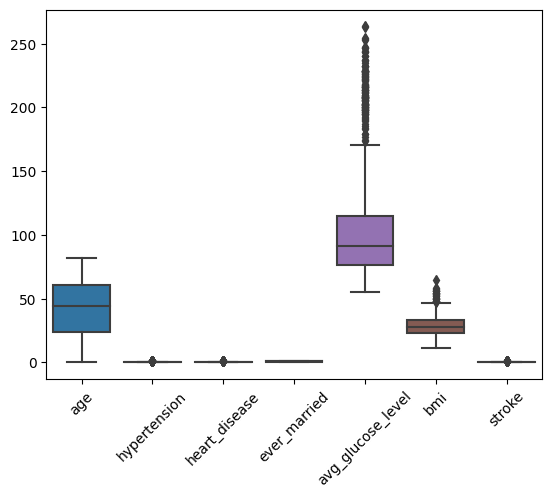

In [219]:
# Creates a boxplot from the original data in order to show differences in outliers
ax = sns.boxplot(data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
print(df_train.columns.tolist())
plt.show()

When analyzing the numeric data using box plots, I noticed the significant amount of outliers present in bmi and avg_glucose_level so I decided to take a closer look and create a box plot for each of these variables individually. It can also be noted that there may be more outlying values in BMI because the missing values were replaced with the mean.

<Axes: >

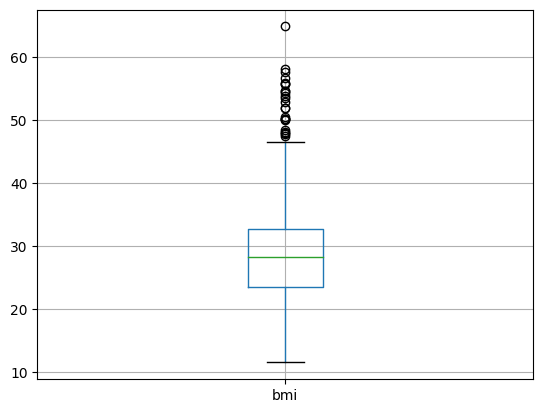

In [220]:
X_train.boxplot(column='bmi')

<Axes: >

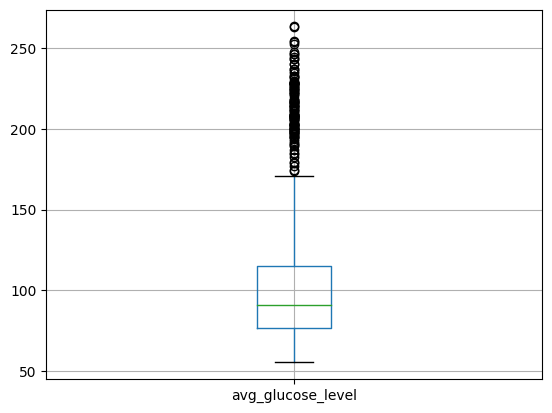

In [186]:
X_train.boxplot(column='avg_glucose_level')

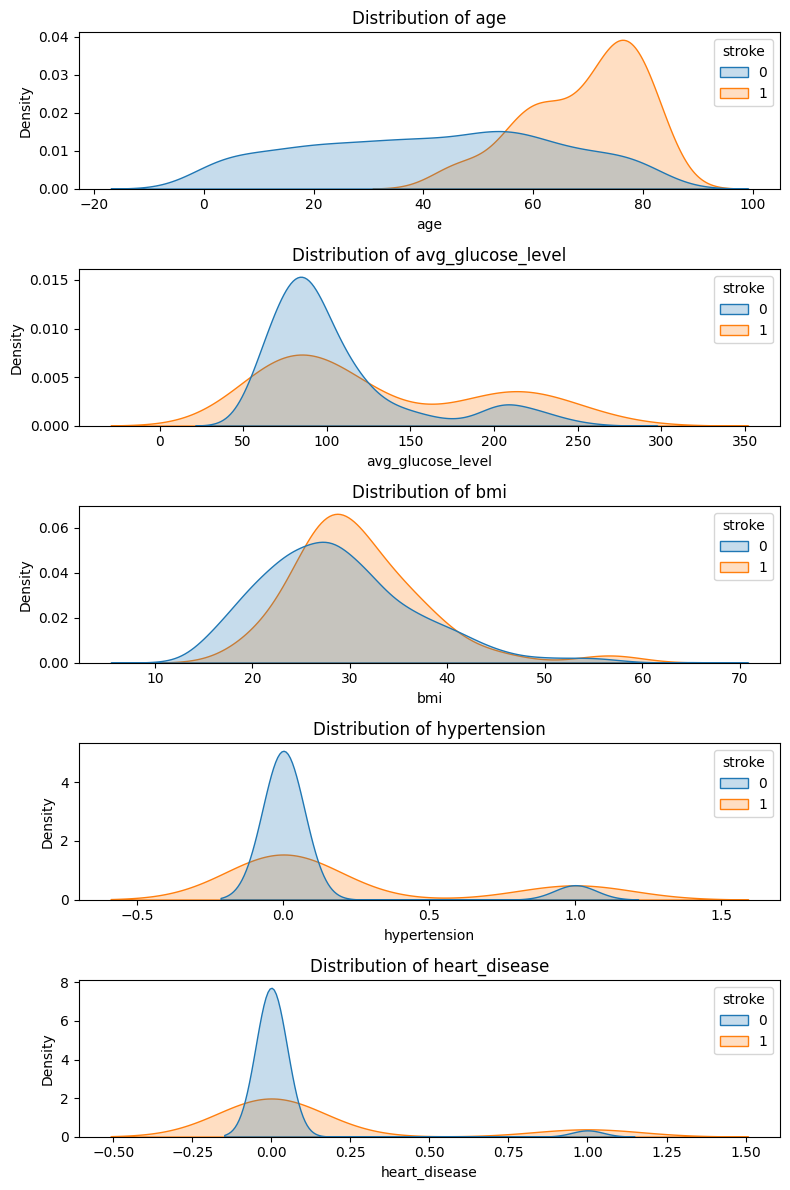

In [259]:
columns_to_plot = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 12))

# Plot each column using sns.kdeplot
for i, column in enumerate(columns_to_plot):
    sns.kdeplot(data=df_train, x=column, hue='stroke', ax=axes[i], fill=True, common_norm=False)
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

Kernel desity plots showing the probability the probability density distribution for each of the numeric variables. The plots show that as age increases, especially past the age of 40, so does the risk of a stroke occuring. BMI also seems to be a significant factor here, with stroke likelihood also increasing with increased BMI.  

Text(0.5, 1.0, 'Correlation Matrix of Numeric Variables')

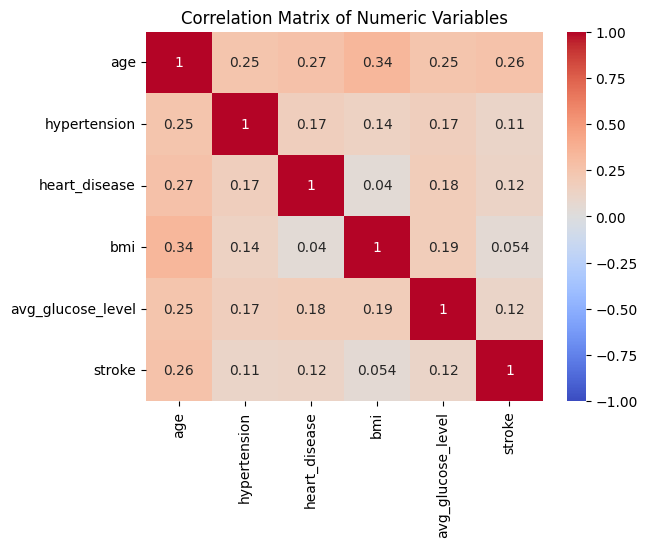

In [222]:
corr_matrix = X_train_numeric_2.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numeric Variables")

I decided to create a correlation matrix for the numeric variables in order to see which variables would likely be our strongest predictors. Age unsurprisingly had the highest correlation to the likelyhood of a stroke, with heart disease and glucose level at a distant second, followed closely by hypertension, with bmi having the least correlation by this standard which seems to be contrary to the kernel density plots above.

In [224]:
# Create a function to calculate the maximum/minimum for the normalization
def normalizer(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# We can then train our knn using this function on our combined data
train_knn = training_data_combined.apply(normalizer)
test_knn = test_data_combined.apply(normalizer)

# Below we determine the optimal k by looping and repeatedly checking the training error to determine the best results
k = 70
k_select = np.arange(1,k)
training_error = np.zeros(k-1)

# Loop through all the k's we would like to test
for k in range(k-1):

    # Attempt to fit the knn model and store the error in the training errors array
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted_model = model.fit(train_knn,y_train)
    y_hat = fitted_model.predict(test_knn)
    training_error[k] = np.sum( (y_test-y_hat)**2 )


error_min = np.min(training_error)
index = np.where(training_error==error_min)
k_optimal = k_select[index][0]

In [226]:
# We can then create a k nearest neighbor model using the optimal k we found above
knn_model = KNeighborsRegressor(n_neighbors=max(6,k_optimal))
knn_optimal = knn_model.fit(train_knn,y_train)
y_hat_knn = knn_optimal.predict(test_knn)
residuals_knn = y_test - y_hat_knn

# Calculate RMSE and R^2
error_knn = np.sum( (y_test-y_hat_knn)**2 )
N_test = len(y_test)
MSE_knn = error_knn/N_test
RMSE_knn_num = (error_knn/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_knn_num = 1 - error_knn/TSS
print(f'RMSE: {RMSE_knn_num:.2f}')
print(f'R^2: {R2_knn_num:.2f}')

RMSE: 0.21
R^2: 0.04


The attempt at creating a K nearest neighbor model for predicting stroke likelihood ended in a poor model, with an R2 of 0.04 and RMSE of 0.21, I decided to move on from the K nearest neighbor model and attempt to use a decision tree model.

0.9503303156349401
0.22286696562088323


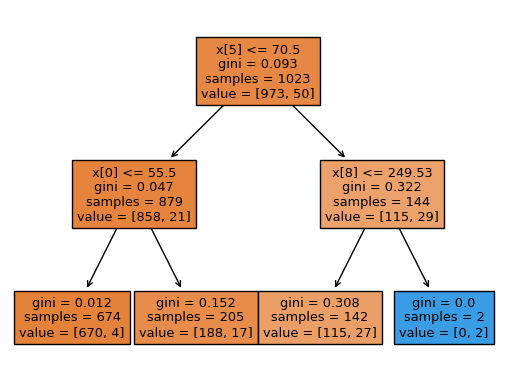

In [231]:
# Create a decision tree for the data
classify = tree.DecisionTreeClassifier(max_depth=2)
classify = classify.fit(training_data_combined, y_train)

# Plot the decision tree below
tree.plot_tree(classify,filled=True)

# Using the test set of data create a classifier for the training data
y_hat = classify.predict(test_data_combined)

# Calculate the R2 and RMSE
print(f"{classify.score(test_data_combined, y_test)}") # R squared measure

print(np.sqrt(mean_squared_error(y_test, y_hat))) #RMSE

After playing around with the depth and trying different variable combinations, I settled on this iteration of a decision tree for my final model. While the R2 looks promising with a value 0.95, I fear this may be a bit misleading in the accuracy of the model in predicting actual incidences of stroke. The model does have a high degree of accuracy in predicting the outcome of stroke or no stroke, but this is likely because there is a small number of instances of stroke in the data, the high r2 value does show that the model is good at predicting variance.

# Conclusions

The goal for this project was to build the best predictive model I could come up with for determining an individuals likelihood of experiencing a stroke given trial and test data including several patient risk factors, including age, average glucose level, bmi, whether or not they had ever been married, gender, presence of heart disease, hypertension, residence type (Urban or Rural), whether or not the person is a smoker, and type of employment. In doing this project I fear I have not created a model that will save lives in the immediate future, but I do think I have come away with some valuable insights. Firstly, I can say with a fair amount of confidence that age is a significant predictor of stroke likelihood, as age increases so does the likelihood of a stroke occuring. My decision tree model using a depth of 2 was the highest performing model I was able to come up with, the R2 value was fairly promising with a value of 0.95, but as I have mentioned above this may be a bit misleading in its accuracy to actually predict instances of strokes occuring, but it does mean that the model does well at predicting and explaining variability. The RMSE value ended up at .223, which is higher than the 0.208 that the original linear regression model, so it failed to improve in that regard which means that it's ability to precisely predict outcomes of stroke is fairly poor.  I am sure that someone more adept in the world of data science could build a better prediction model with the data given, but it is unlikely that even the most optimal model built using this data could be an accurate enough predictor of stroke to be of use in the real world. If I were to suggest ideas for future research on this topic, I would encourage using a much larger data set with more variables that could be predictors of an individuals health such as frequency of exercise, drug history, family history of stroke, etc.